# <font color='#eb3483'> Interactive visualizations in Jupyter Notebooks </font>


### What is interactivity and why is it useful?


Let's have a quick look at my favourite COVID-19 dashboard on [Our World in Data](https://ourworldindata.org/explorers/coronavirus-data-explorer?zoomToSelection=true&time=2020-03-01..latest&country=USA~GBR~CAN~DEU~ITA~IND~AUS~ZAF~ESP~BRA~CHN~FRA~JPN~NLD~RUS&region=World&pickerMetric=location&pickerSort=asc&Interval=Cumulative&Align+outbreaks=false&Relative+to+Population=true&Metric=Confirmed+cases)

<div>
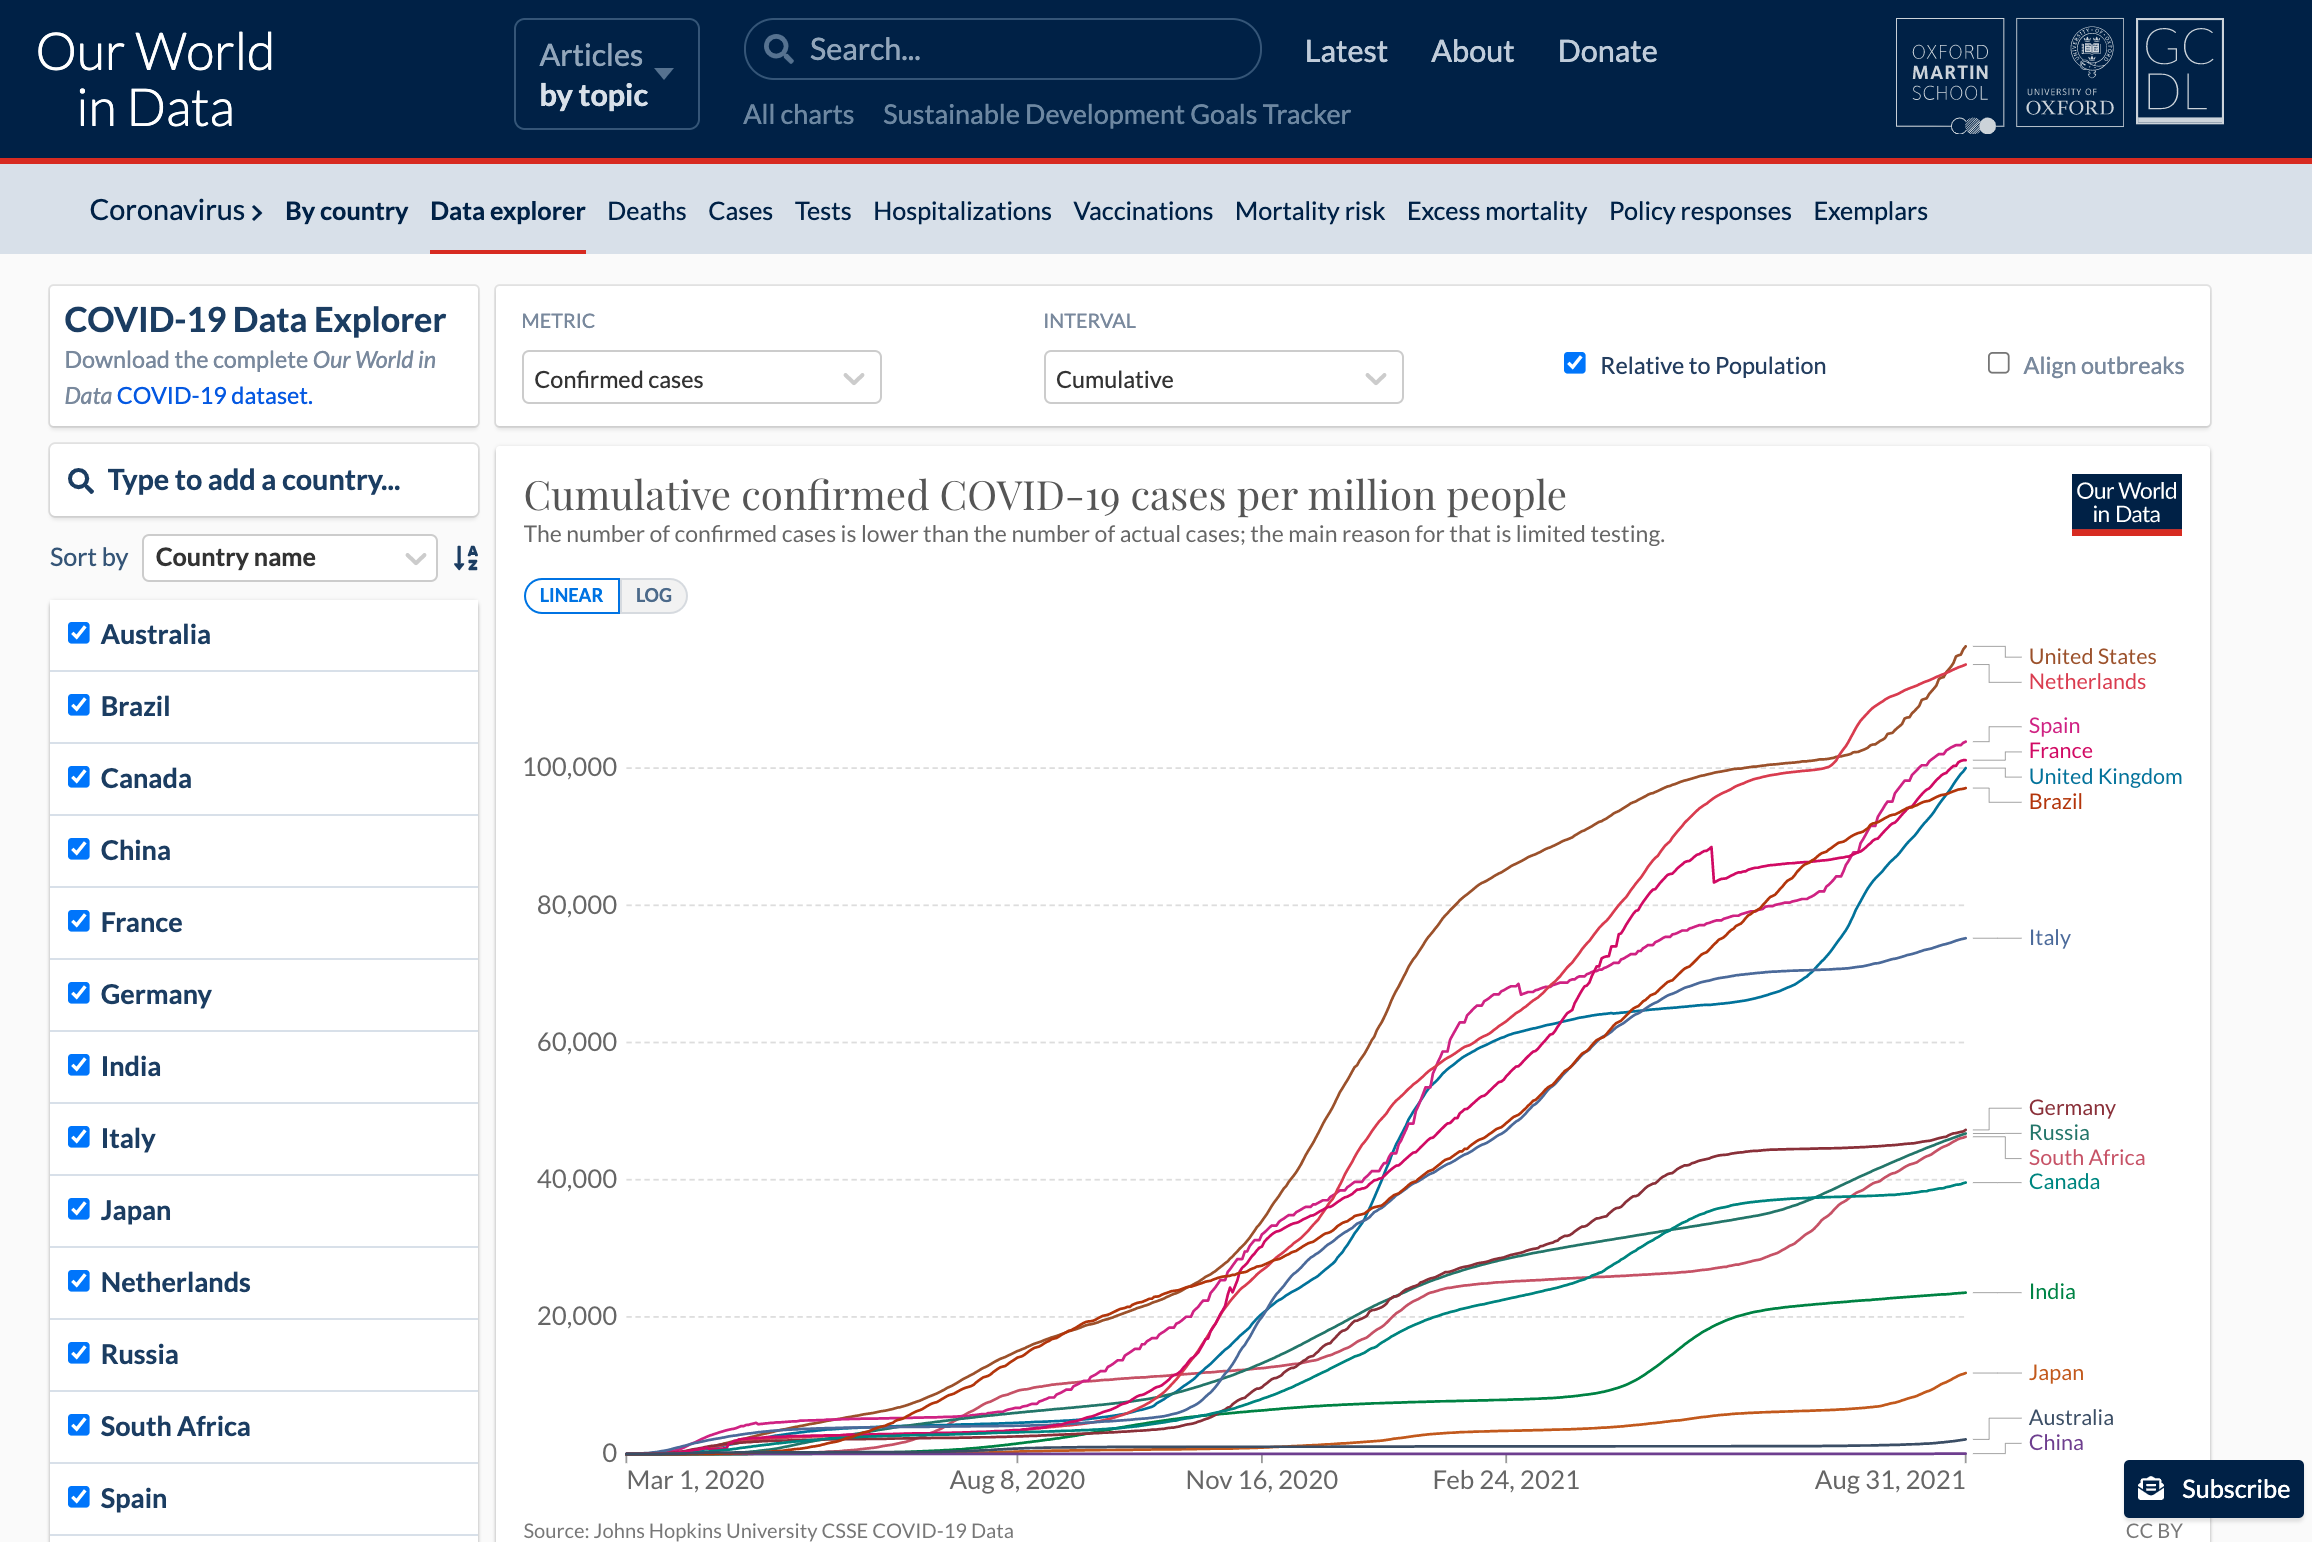
</div>

## <font color='#eb3483'> You will see three major themes of interactive visualisations: </font>
### <font color='#eb3483'> 1. Reactive inputs (e.g. specify countries) --> IPyWidgets </font>
### <font color='#eb3483'> 2. Interactive visualizations (e.g. hover over the lines) --> Plotly Express  </font>
### <font color='#eb3483'> 3. Interactive maps (switch to map view tab) --> Folium  </font>



We are going to try out all three types of interactivity below:

<hr>

## <font color='#eb3483'> 1) IPyWidgets (selections/widgets) </font>


Good start to check out the ipywidgets [documentation page.](https://ipywidgets.readthedocs.io/en/stable/)

So how does this work anyway? It's actually a pretty easy recipe.

<div>
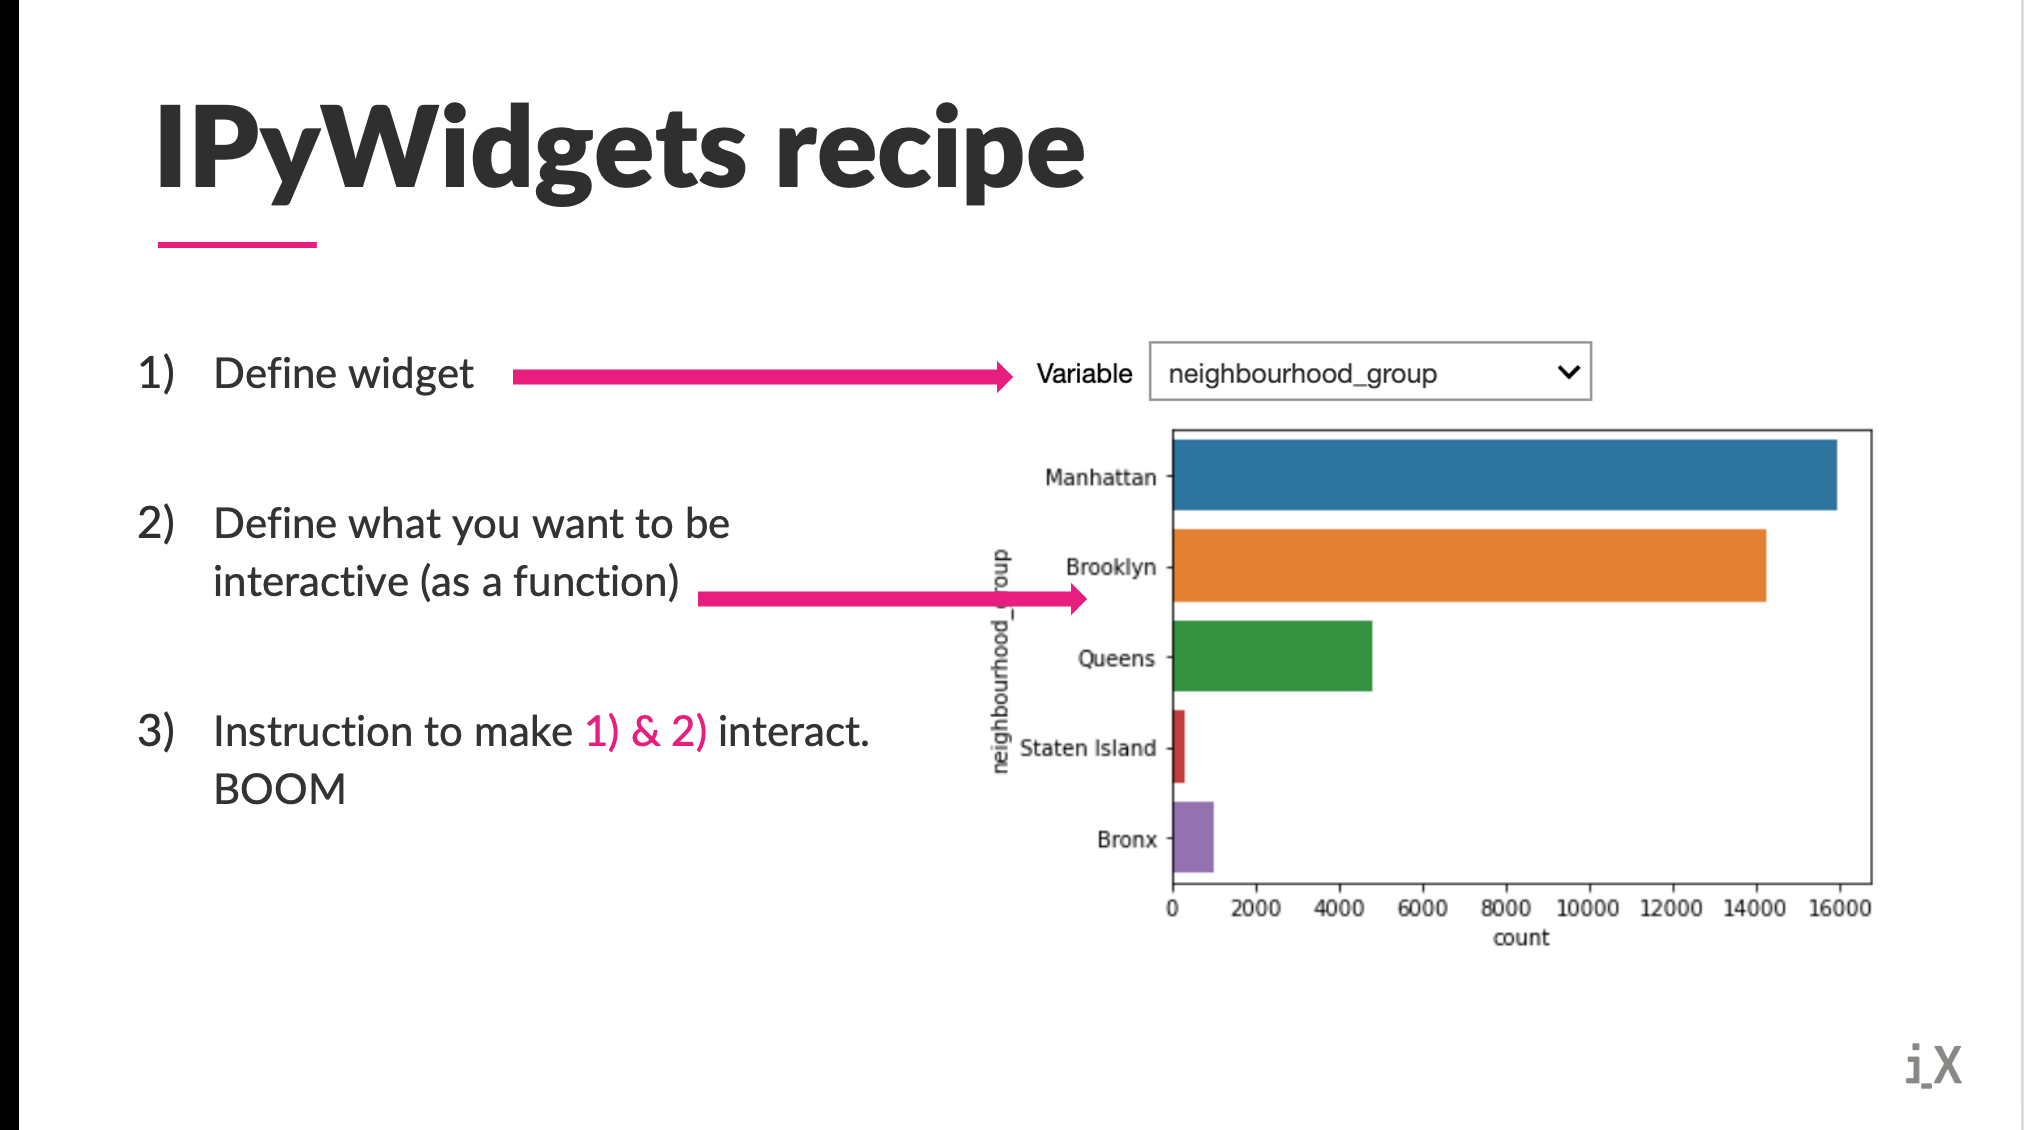
</div>

## <font color='#eb3483'> STEP 1: Define the widget </font>


In [ ]:
# import ipywidgets
import ipywidgets as widgets

In [ ]:
# in it's most basic form
#Example using a slider of numbers

widgets.IntSlider()


But obviously we want to be able to customise these. Widgets come many optional arguments to do this:

### <font color='#eb3483'> Integar slider </font>


In [ ]:
widgets.IntSlider(
    value = 7, 
    min=0,
    max=10,
    step = 1,
    description="Coffees:",
    orientation='horizontal',
    disabled=False,
    continuous_update=False,
    readout=True,
)

#You dont need all the paramters - this would run just the same
#widget.IntSlider(value = 7, min=0, max=10, step=1, description='Coffees')



### <font color='#eb3483'> Dropdown </font>


In [ ]:
widgets.Dropdown(
    options=['1 - Mellow', '2 - Medium', '3 - Fiyaaaah'],
    value='2 - Medium',
    description='Chilli rating:',
    disabled=False,
)

### <font color='#eb3483'> Radio Buttons </font>


In [ ]:
widgets.RadioButtons(
    options=['USA', 'Pakistan', 'India', 'China', 'South Africa'], 
    value=  'USA', 
    description='Country:',
    disabled=False
)

### <font color='#eb3483'> Date Picker </font>


In [ ]:
widgets.DatePicker(
    description='Pick a Date',
    disabled=False
)

In [ ]:
from IPython.display import IFrame
documentation = IFrame(src='https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html', 
                       width=1000, 
                       height=400)
display(documentation)

## <font color='#eb3483'> Okay. Let's try this on our data ... </font>


In [ ]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load our data
df = pd.read_csv("data/ny_airbnb_processed.csv")
df.head()

In [ ]:
 # have a quick look at column names again *
df.columns

## <font color='#eb3483'> Example 1: </font>
    
## <font color='#eb3483'>    Let's make a countplot where we can change which variable we count using a widget</font>



### <font color='#eb3483'> STEP 1: Define the desired widget </font>

In [ ]:
column_options = ["neighbourhood_group", "room_type"]

my_col_widgets = widgets.Dropdown(           # name the widget and specify what kind of widget you want
    options= column_options,                 # options you want - you could type the options here directly 
    value="neighbourhood_group",             # default value
    description='Variable'                   # name alongside widget
)

In [ ]:
# check the widget works by just calling the object name
my_col_widgets

### <font color='#eb3483'> STEP 2: Define the function for the interactive object </font>

### Okay Woah! Let's take a step back. What is a function.

A function is simply a “chunk” of code that you can use over and over again, rather than writing it out multiple times.  


In Python a function is defined using the `def` keyword.  


In [ ]:
# the format of a function is 
def name_of_function(arguments needed, however many you need):
    the_code_you_want_to_execute

    

In [ ]:
#For example let's make a function that doubles a number
def make_it_double(x):
    print(x*2)

In [ ]:
make_it_double(5)

In [ ]:
# try it out
#make a function that calculates a number squared 


Okay - now that you get how a function works - we are going to make a generic graphic function below

In [ ]:
# An easy  way to do this when you are starting 
# is to start with your desired object/graph as normal. 
# And then turn this into a function. 

sns.countplot(y = df["neighbourhood_group"])


In [ ]:
#sns.countplot(y = df["neighbourhood_group"]) 
#- so work on just generalising our graph code --> 


def cat_count_plot(airbnb_variable): 
   sns.countplot(y = df[airbnb_variable])

In [ ]:
#This function should work as is - so try an example to check

cat_count_plot("neighbourhood_group")

### <font color='#eb3483'> STEP 3: Make them interact </font>

In [ ]:
#You can read it like this ... 
# Make my widget interact(for the function i called cat_count_plot),
# by making the defined needed variable called airbnb_variable = to one of the options 
# listed in the my_col_widgets 

widgets.interact(cat_count_plot, # the name of the graph object we defined
                 airbnb_variable = my_col_widgets) # the instruction to make the function argument be from the widget

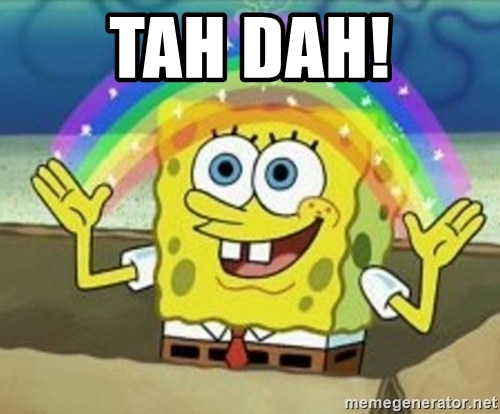

## <font color='#eb3483'> Example 2: </font>
## <font color='#eb3483'>   Let's make a countplot for the different room types where we can change the neighbourhood group using a widget </font>



In [ ]:
#remind ourselvesof the columns
df.head()

### <font color='#eb3483'> STEP 1: Define the desired widget </font>

In [ ]:
# get options for the widget
nhoods =np.sort(df.neighbourhood_group.unique())
nhoods

In [ ]:
#STEP 1: DEFINE THE WIDGET - cont
nhood_choices= widgets.RadioButtons(
    options= nhoods, 
    value=  'Brooklyn', 
    description='Neighborhood:',
    disabled=False
)

nhood_choices # check it works

### <font color='#eb3483'> STEP 2: Define the function for the interactive object </font>

In [ ]:
# make a non interactive version example of figure we want.
sns.countplot(data = df[df["neighbourhood_group"] == "Bronx"], 
              y="room_type").set_title("Bronx")

In [ ]:
# now make it into a function
def nhood_roomtype(nhood):
    sns.countplot(data = df[df["neighbourhood_group"] == nhood], 
              y="room_type").set_title(nhood)

In [ ]:
nhood_roomtype("Queens") # check it works

### <font color='#eb3483'> STEP 3: Make them interact </font>

In [ ]:
widgets.interact(nhood_roomtype, nhood=nhood_choices)

---

### <font color='#eb3483'> BREAK OUT ROOM - TRY IT OUT </font>


### <font color='#eb3483'> EXERCISE1) Make a radio button widget for each day of the week </font>




### <font color='#eb3483'>EXERCISE 2): Make a scatterplot of price vs review_rating, where a user can select the desired neighbourhood_group. Use a radio button widget for the neighbourhood_group. </font>





### <font color='#eb3483'> Extension - Make a drop down for the variable plotted against price </font>



# <font color='#eb3483'> 2. Plotly Express (interactivity) </font>


Plotly has great [documentation](https://plotly.com/python/).

And a really handy [summary reference](https://plotly.com/python-api-reference/plotly.express.html).

Here is also a really comprehensive [article](https://towardsdatascience.com/visualization-with-plotly-express-comprehensive-guide-eb5ee4b50b57) if you want to dive a little deeper.

So how does this work anyway? Luckily for us it is preeeeeeeetty similar to Seaborn and is actually very simple.

Let's import the package. 

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
df = pd.read_csv("data/ny_airbnb_processed.csv")
df.head()

Let's start basic and build step by step to check out the functionality (just as we did with Seaborn).

In [ ]:
# let's use px.scatter to plot a scatter of price vs review_scores

# in its simplest form the arguments need have px.scatter(data, x, y)
df = df[df.price<3500] # --> remove some outliers

px.scatter(df, x="price", y="review_scores")


In [ ]:
# we can advance this slightly by coloring by e.g. neighbourhood_group
px.scatter(df, x="price", y="review_scores", 
           color='neighbourhood_group')

In [ ]:
#hmmmm bit tricky to tell whats going on there. 
#Let's facet by neighbourhood_group instead. using facet_col or facet_row

px.scatter(df, x="price", y="review_scores", 
           color='neighbourhood_group', 
           facet_col='neighbourhood_group')



In [ ]:
#Hmmmm, looks okay, but the labels are a disaster. How do we fix this?
#did i know this offhand - nope I googled - plotly facet titles overlap - and found a solution on stack exchange. 
# that I copy and pasted. - WHOOP! 

fig5 = px.scatter(df, x="price", y="review_scores", 
                  color='neighbourhood_group', 
                  facet_col='neighbourhood_group')
fig5.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig5.show()


In [ ]:
#Hmmm can we make the factors alphabetical
# look up help again 
fig6 = px.scatter(df, x="price", y="review_scores", 
                  color='neighbourhood_group', 
                  facet_col='neighbourhood_group', 
                  category_orders = {"neighbourhood_group": ["Bronx", "Brooklyn", "Manhattan","Queens", "Staten Island" ]}
                )
fig6.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig6.show()

In [ ]:
# let's try change the hover values
fig7 = px.scatter(df, x="price", y="review_scores", 
                  color='neighbourhood_group', 
                 facet_col='neighbourhood_group', 
                 category_orders = {"neighbourhood_group": ["Bronx", "Brooklyn", "Manhattan","Queens", "Staten Island" ]},
                 hover_data = ["neighbourhood", "price", "review_scores"]
                )
fig7.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig7.show()

In [ ]:
# try it as a facet row instead.

In [ ]:
# lets try faceting twice # facet room_type by neighbourhood_group - using facet_col and facet_row



### <font color='#eb3483'> EXERCISE 3): Make a scatterplot of price vs review_rating, where a user can select the desired neighbourhood_group. Use a radio button widget for the neighbourhood_group. (same as above just with plotly) </font>



<hr>

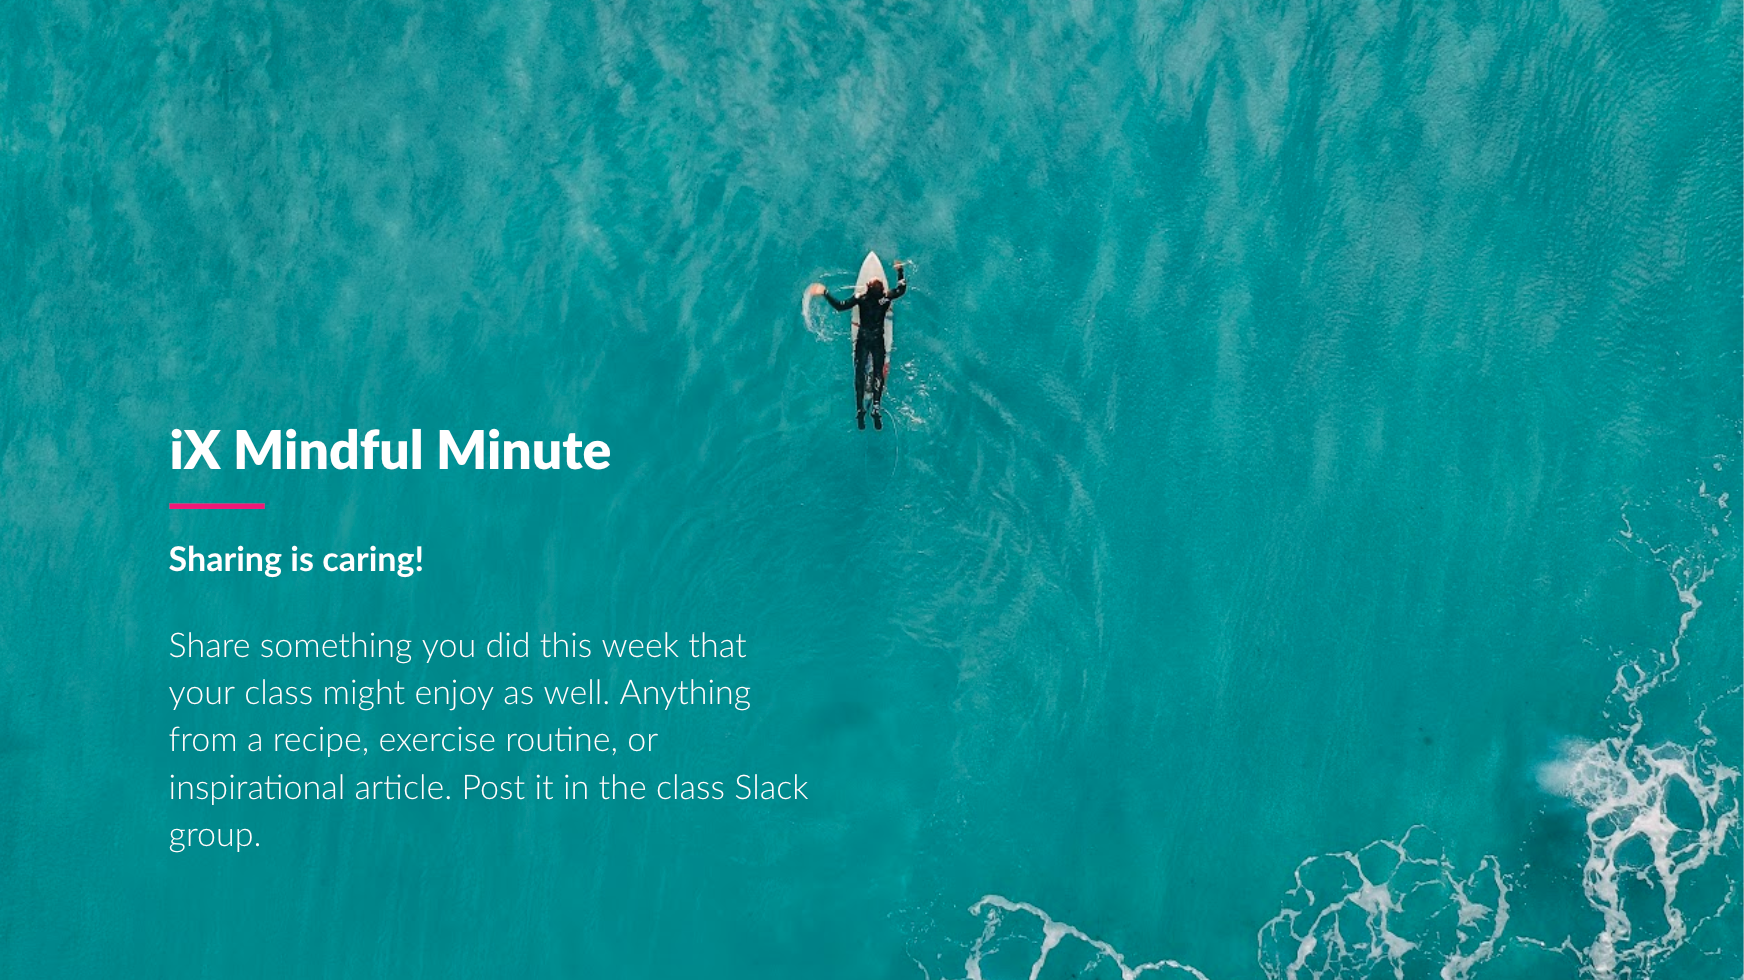

---

# <font color='#eb3483'> 3. Interactive maps with Folium  </font>



Want to make an interactive map - Where do we even start???

When in doubt - visit the python graphy gallery [website](https://www.python-graph-gallery.com/) for some ideas. 

## <font color='#eb3483'> Maps with Folium </font>
## <font color='#eb3483'> a) Cluster map - Number of points </font>


In [ ]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#to make the interactive maps
!pip install folium
import folium
from folium.plugins import FastMarkerCluster
!pip install geopandas
import geopandas as gpd
from branca.colormap import LinearColormap

In [ ]:
df = pd.read_csv("data/ny_airbnb_processed.csv")
df.head()

In [ ]:
lats = df['latitude'].tolist()       # specify latitudes from our dataframe
lons = df['longitude'].tolist()      #  specify longitudes from our dataframe
locations = list(zip(lats, lons))    # zip these together (correlate to each other)

# start with a generic map (you can map this on it's own)
map1 = folium.Map(location=[40.753, -73.9856], zoom_start=10) 


In [ ]:
# and add our locations to it.
FastMarkerCluster(data=locations).add_to(map1) 
map1

Can you think of an example where this kind of map could be useful?

## <font color='#eb3483'> b) Heatmap of points </font>


In [ ]:
import folium
from folium.plugins import HeatMap

#Play around with the parameters and see how it changes
map_folium = folium.Map([40.753, -73.9856],zoom_start=10)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(map_folium)
display(map_folium)

## <font color='#eb3483'> c) Choropleth </font>


In [ ]:
import geopandas as gpd


In [ ]:
#For a Chloropleth - you will need a json file that defines the geographic boundaries you need.
#Many websites will have these for countries, or states etc. Just try a google for what you need.

#This one is actually supplied by AirBnB
nhoods_geojson = gpd.read_file("data/neighbourhoods.geojson")

#print(nhoods_geojson.head())
nhoods_geojson

In [ ]:
# we will need a value to plot per polygon/neighbourhood
#here I am getting the means for all the columns in our dataframe and then I can choose which to plot

nhood_means = df.groupby("neighbourhood").mean().reset_index()
nhood_means.head()

In [ ]:
# using the merge function I am joining the two tables together 
#(the boundaries table and the summary table. Joining together by the unique identifier 
# of the neighbourhood name.
maps_data = nhoods_geojson.merge(nhood_means, on='neighbourhood', how='left')
maps_data.head()

In [ ]:
sample_map = folium.Map([40.753, -73.9856],zoom_start=10)
#display(sample_map)

In [ ]:
#Did i know this code - heeeeeeell no. I copy and pasted it from Python Graph Gallery!

#play around with the settings and see what they do.
# Set up Choropleth map
folium.Choropleth(
    geo_data=maps_data,
    data=maps_data,
    columns=['neighbourhood', 'price'],
    key_on="feature.properties.neighbourhood",
    fill_color='YlGnBu',
fill_opacity=1,
line_opacity=0.2,
legend_name="Price",
smooth_factor=0,
Highlight= True,
line_color = "black",
name = "Price",
show=False,
overlay=True,
nan_fill_color = "White"
).add_to(sample_map)

sample_map


### <font color='#eb3483'> EXERCISE 4): Make a similar graph to c) Choropleth but instead of plotting by neighbourhood - plot by neighbourhood_group. </font>



### <font color='#eb3483'> Extra challenge - homework </font>


 You can also make Choropleths in Plotly to enable hover interactivity (hover info) - 
 read this - https://plotly.com/python/choropleth-maps/ - and try it out for homework. Paste a screen grab on slack if you figure it out.

Important! No solutions will be posted to these challenges. I would like to encourage you to work together as a class and help each other. If you need an answer or help - best be asking on slack :) OR book a slot with a TA

## <font color='#eb3483'>  Saving and sharing interactive visualisations?</font>


Now that we are done, what are our options for saving these visualisations to share with others?
